# Time Series Modeling

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
cities = pd.read_csv("D:\TechWiz5\Climate-Change-Earth-Surface-Temperature-Data\GlobalLandTemperaturesByCity.csv")
oslo = cities.loc[cities['City'] == 'Oslo', ['dt','AverageTemperature']]
oslo.columns = ['Date','Temp']
oslo['Date'] = pd.to_datetime(oslo['Date'])
oslo.reset_index(drop=True, inplace=True)
oslo.set_index('Date', inplace=True)

#I'm going to consider the temperature just from 1900 until the end of 2012
oslo = oslo.loc['1900':'2013-01-01']
oslo = oslo.asfreq('M', method='bfill')
oslo.head()

,Temp
Date,
1900-01-31,-12.486
1900-02-28,-4.265
1900-03-31,0.084
1900-04-30,5.180
1900-05-31,13.357


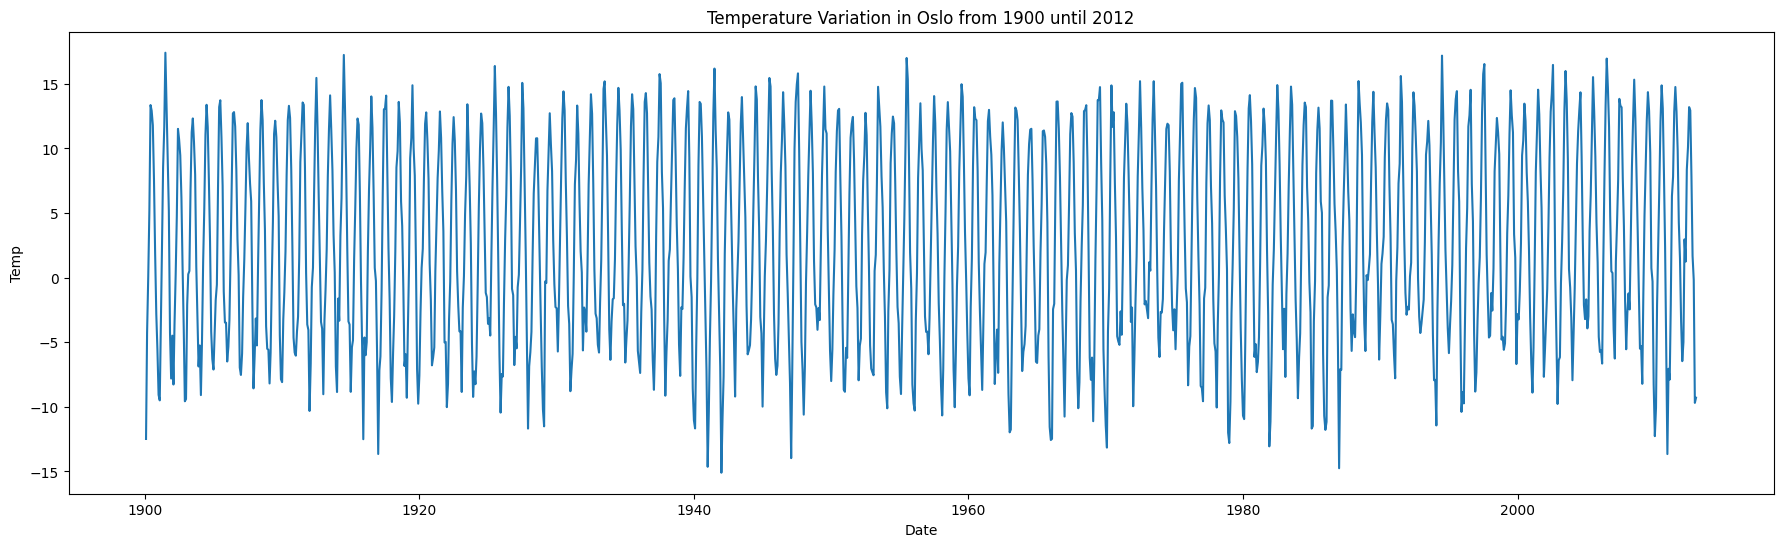

In [5]:
plt.figure(figsize=(22,6))
sns.lineplot(x=oslo.index, y=oslo['Temp'])
plt.title('Temperature Variation in Oslo from 1900 until 2012')
plt.show()

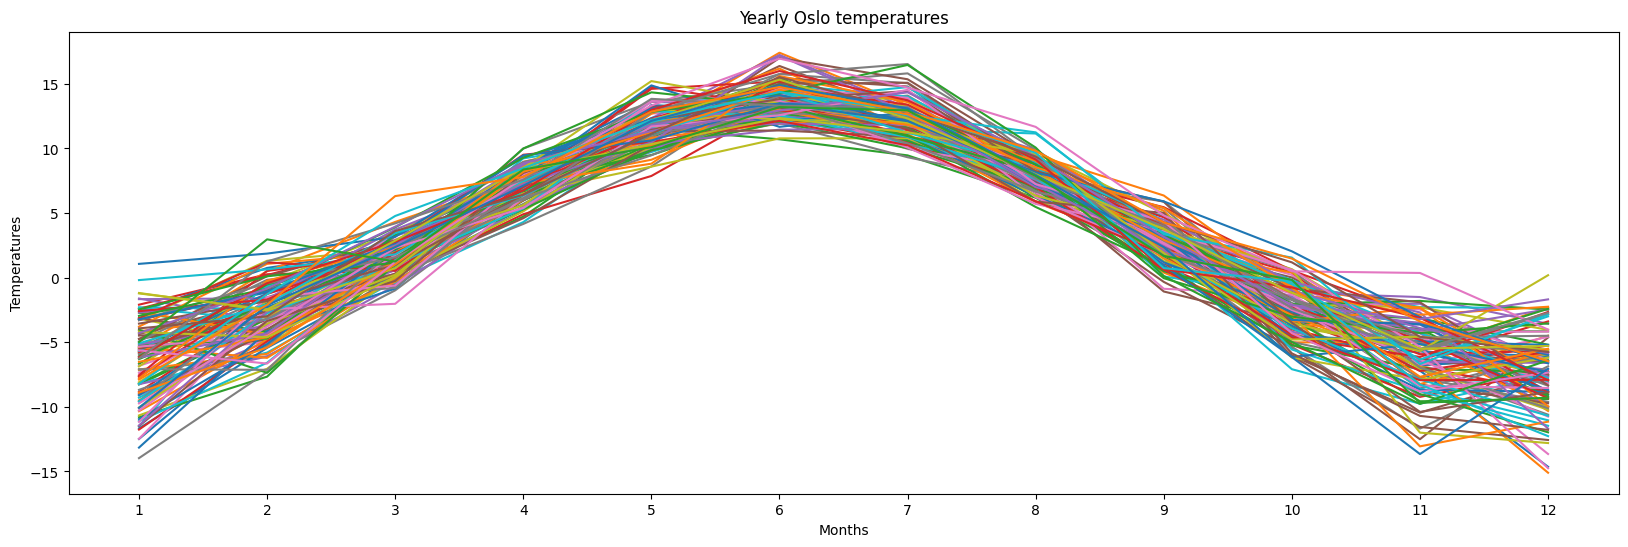

In [6]:
oslo['month'] = oslo.index.month
oslo['year'] = oslo.index.year
pivot = pd.pivot_table(oslo, values='Temp', index='month', columns='year', aggfunc='mean')
pivot.plot(figsize=(20,6))
plt.title('Yearly Oslo temperatures')
plt.xlabel('Months')
plt.ylabel('Temperatures')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()